In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [15]:
df1 = pd.read_csv("2017onformated.csv")
df1.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61,232000
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60,250000
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62,262000
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62,265000
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62,265000


In [80]:
dfn13 = pd.read_csv("2000-2023no2013-14.csv")
dfn13.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2000-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986,85,147000.0
1,2000-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,85,144000.0
2,2000-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,75,159000.0
3,2000-01,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,75,167000.0
4,2000-01,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1976,75,163000.0


In [16]:
df1['flat_type'].unique()
df1.groupby('flat_type')['flat_type'].agg('count')

flat_type
1 ROOM                 61
2 ROOM               2647
3 ROOM              38127
4 ROOM              68009
5 ROOM              40660
EXECUTIVE           12261
MULTI-GENERATION       73
Name: flat_type, dtype: int64

In [65]:
df2 = pd.read_csv("2000-2023.csv")
df2['flat_type'].unique()
df2.groupby('flat_type')['flat_type'].agg('count')

flat_type
1 ROOM                 470
2 ROOM                7130
3 ROOM              178181
4 ROOM              245520
5 ROOM              142915
EXECUTIVE            46370
MULTI-GENERATION       259
Name: flat_type, dtype: int64

In [66]:
#add bedroom,bathroom and other fasilities using following data
#reference : https://www.hdb.gov.sg/residential/buying-a-flat/finding-a-flat/types-of-flats#:~:text=Executive%20flats%20feature%20an%20additional,Common%20bathroom
df3 = pd.DataFrame({'bedroom': [1,1,2,3,3,3,4],
                    'bathrooom': [1,1,2,2,2,2,3],
                    'separatekitchen': [0,1,1,1,1,1,1],
                    'studyroom': [0,0,0,0,1,1,0],
                    'HShelter': [0,1,1,1,1,0,1],
                    'flat_type': ['1 ROOM', '2 ROOM', '3 ROOM', '4 ROOM','5 ROOM','EXECUTIVE','MULTI-GENERATION']})

In [67]:
merged_df = pd.merge(df2, df3, on='flat_type')
merged_df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,bedroom,bathrooom,separatekitchen,studyroom,HShelter
0,2000-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986,14,147000.0,2,2,1,0,1
1,2000-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,14,144000.0,2,2,1,0,1
2,2000-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,24,159000.0,2,2,1,0,1
3,2000-01,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,24,167000.0,2,2,1,0,1
4,2000-01,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1976,24,163000.0,2,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
620840,2022-11,BUKIT MERAH,1 ROOM,7,TELOK BLANGAH CRES,04 TO 06,31.0,Improved,1975,51,233888.0,1,1,0,0,0
620841,2022-12,BUKIT MERAH,1 ROOM,7,TELOK BLANGAH CRES,04 TO 06,31.0,Improved,1975,51,235000.0,1,1,0,0,0
620842,2023-03,BUKIT MERAH,1 ROOM,7,TELOK BLANGAH CRES,01 TO 03,31.0,Improved,1975,51,237000.0,1,1,0,0,0
620843,2023-04,BUKIT MERAH,1 ROOM,7,TELOK BLANGAH CRES,04 TO 06,31.0,Improved,1975,51,240000.0,1,1,0,0,0


In [68]:
#rename month column
merged_df = merged_df.rename(columns={'month': 'soldmonth'})
merged_df.head()

,soldmonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,bedroom,bathrooom,separatekitchen,studyroom,HShelter
0,2000-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986,14,147000.0,2,2,1,0,1
1,2000-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,14,144000.0,2,2,1,0,1
2,2000-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,24,159000.0,2,2,1,0,1
3,2000-01,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,24,167000.0,2,2,1,0,1
4,2000-01,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1976,24,163000.0,2,2,1,0,1


In [69]:
#slipt sold year and month
merged_df[['year', 'month']] = merged_df['soldmonth'].str.split('-', 1, expand=True)

In [70]:
merged_df.head()

,soldmonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,bedroom,bathrooom,separatekitchen,studyroom,HShelter,year,month
0,2000-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986,14,147000.0,2,2,1,0,1,2000,01
1,2000-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,14,144000.0,2,2,1,0,1,2000,01
2,2000-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,24,159000.0,2,2,1,0,1,2000,01
3,2000-01,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,24,167000.0,2,2,1,0,1,2000,01
4,2000-01,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1976,24,163000.0,2,2,1,0,1,2000,01


In [23]:
# add lebels for price ranges
# price ranges and labels
price_ranges = [0,50000,100000,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,950000,1000000,1050000,1100000,1150000,1200000,1250000,1300000,1350000,1400000,1450000,1500000,1550000, float('inf')]  
price_labels = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32]

# Use pd.cut to add labels based on the price ranges
merged_df['price_range'] = pd.cut(merged_df['resale_price'], bins=price_ranges, labels=price_labels)


In [71]:
merged_df.head()

,soldmonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,bedroom,bathrooom,separatekitchen,studyroom,HShelter,year,month
0,2000-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986,14,147000.0,2,2,1,0,1,2000,01
1,2000-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,14,144000.0,2,2,1,0,1,2000,01
2,2000-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,24,159000.0,2,2,1,0,1,2000,01
3,2000-01,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,24,167000.0,2,2,1,0,1,2000,01
4,2000-01,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1976,24,163000.0,2,2,1,0,1,2000,01


In [104]:
priceandyear = merged_df[['resale_price', 'year']]

In [ ]:
df1.groupby('town')['town'].agg('count')

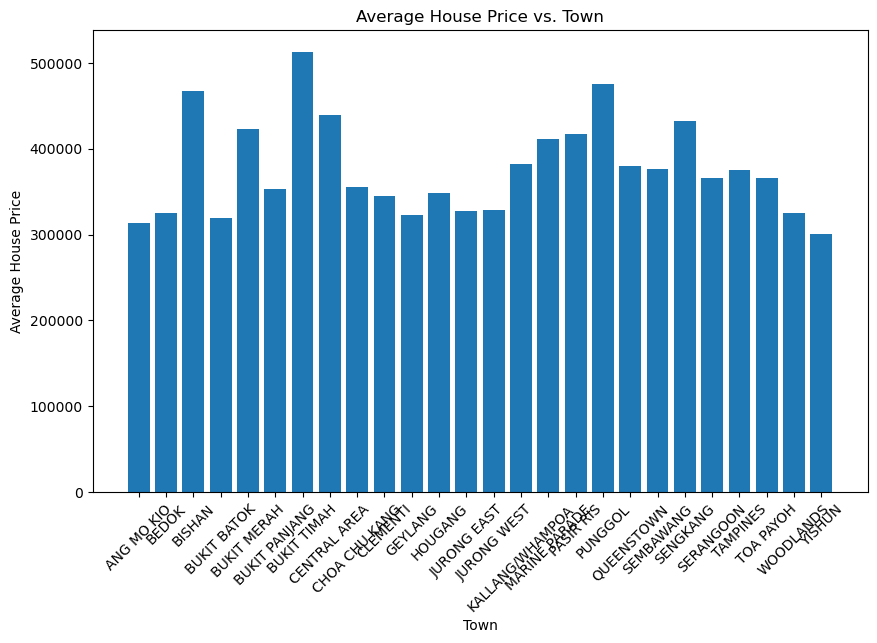

In [72]:
#explore relationship between categorical varibales and target
#explore town vs selling price
average_prices = merged_df.groupby('town')['resale_price'].mean().reset_index()
# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(average_prices['town'], average_prices['resale_price'])
plt.xlabel('Town')
plt.ylabel('Average House Price')
plt.title('Average House Price vs. Town')
plt.xticks(rotation=45)  # Rotate town labels for better readability
plt.show()

In [75]:
average_prices

,town,resale_price
0,ANG MO KIO,313197.929287
1,BEDOK,325329.790110
2,BISHAN,466806.699154
3,BUKIT BATOK,319553.992372
4,BUKIT MERAH,423360.868708
5,BUKIT PANJANG,353353.454224
6,BUKIT TIMAH,512524.832682
7,CENTRAL AREA,439821.086534
8,CHOA CHU KANG,355156.021328
9,CLEMENTI,345144.700631


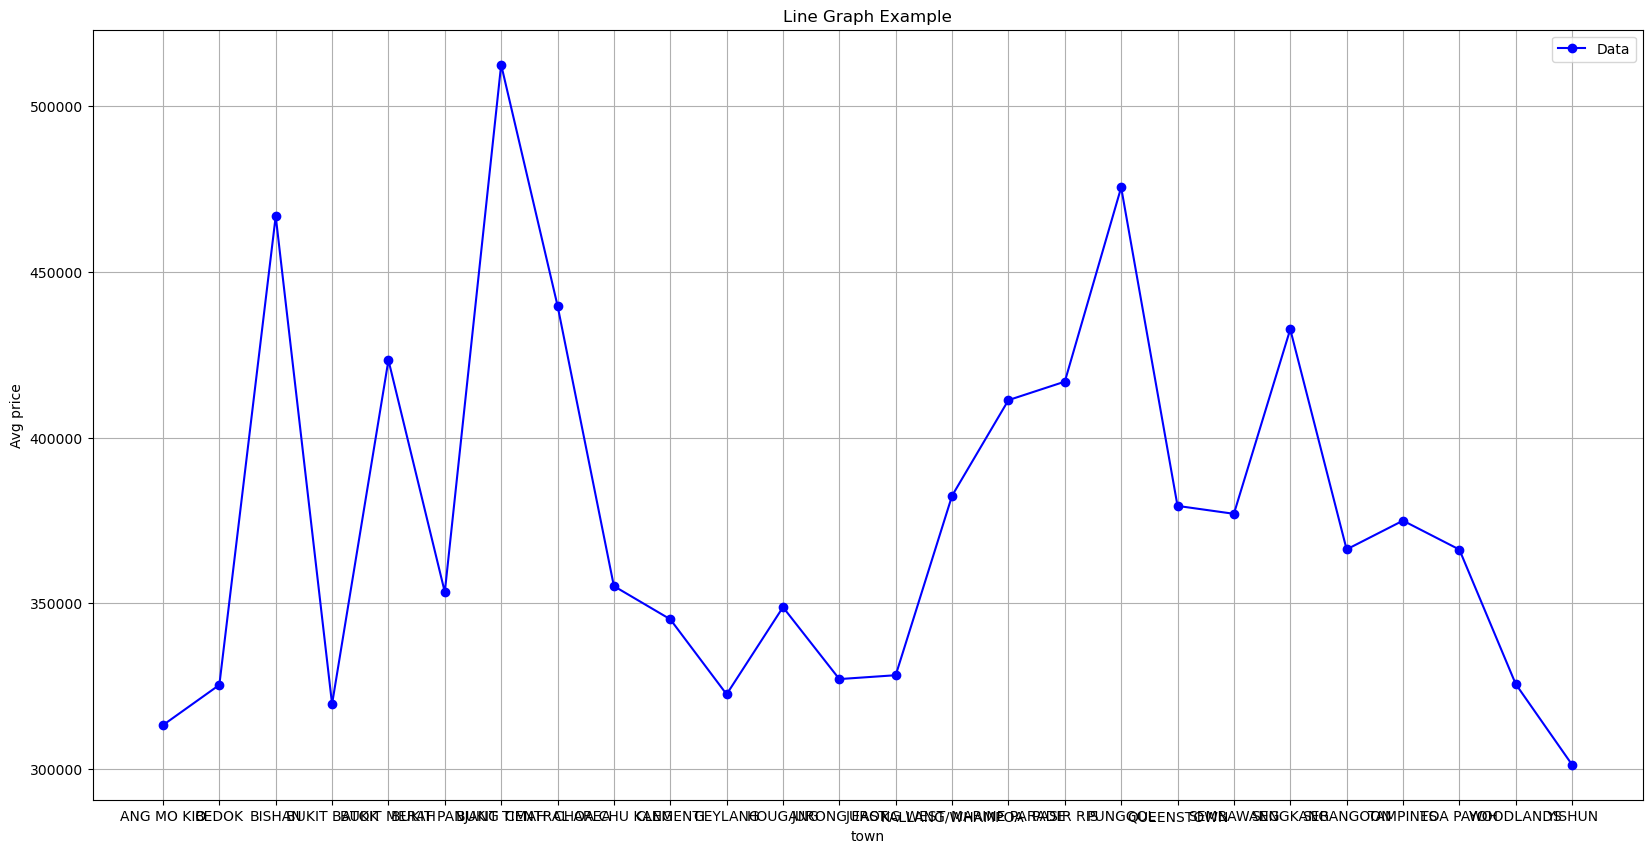

In [76]:
x_values = average_prices['town']
y_values = average_prices['resale_price']

# Create a line graph
plt.plot(x_values, y_values, marker='o', linestyle='-', color='b', label='Data')

# Customize the graph
plt.title('Line Graph Example')
plt.xlabel('town')
plt.ylabel('Avg price')
plt.grid(True)

# Show a legend (if multiple lines)
plt.legend()

# Display the graph
plt.show()

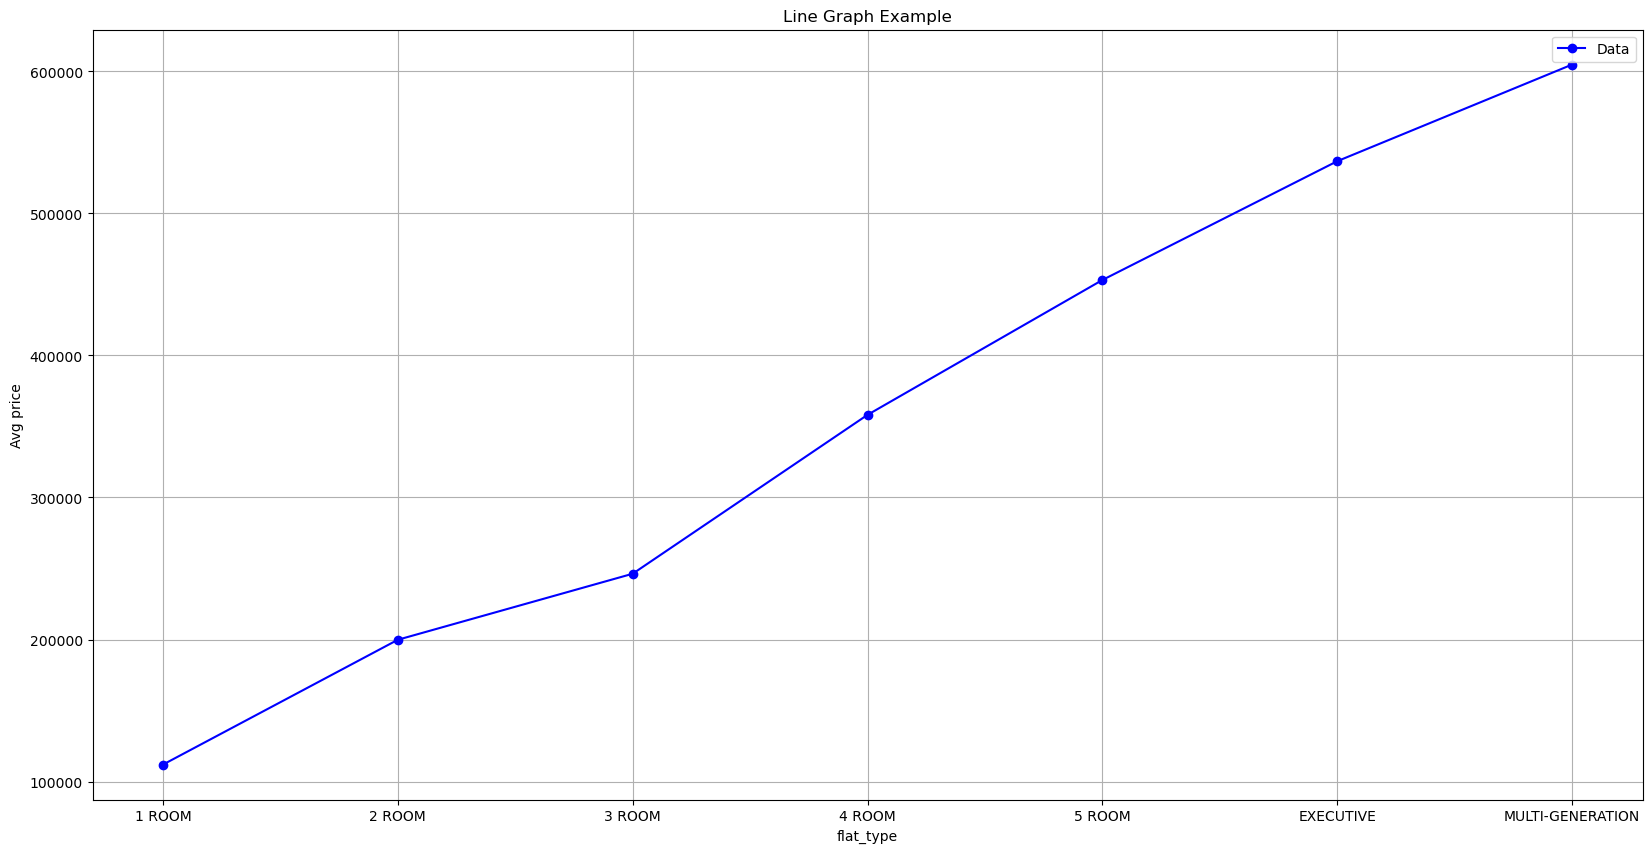

In [77]:
#explore relationship between categorical varibales and target
#explore town vs flat type
average_prices = merged_df.groupby('flat_type')['resale_price'].mean().reset_index()
x_values = average_prices['flat_type']
y_values = average_prices['resale_price']

# Create a line graph
plt.plot(x_values, y_values, marker='o', linestyle='-', color='b', label='Data')

# Customize the graph
plt.title('Line Graph Example')
plt.xlabel('flat_type')
plt.ylabel('Avg price')
plt.grid(True)

# Show a legend (if multiple lines)
plt.legend()

# Display the graph
plt.show()

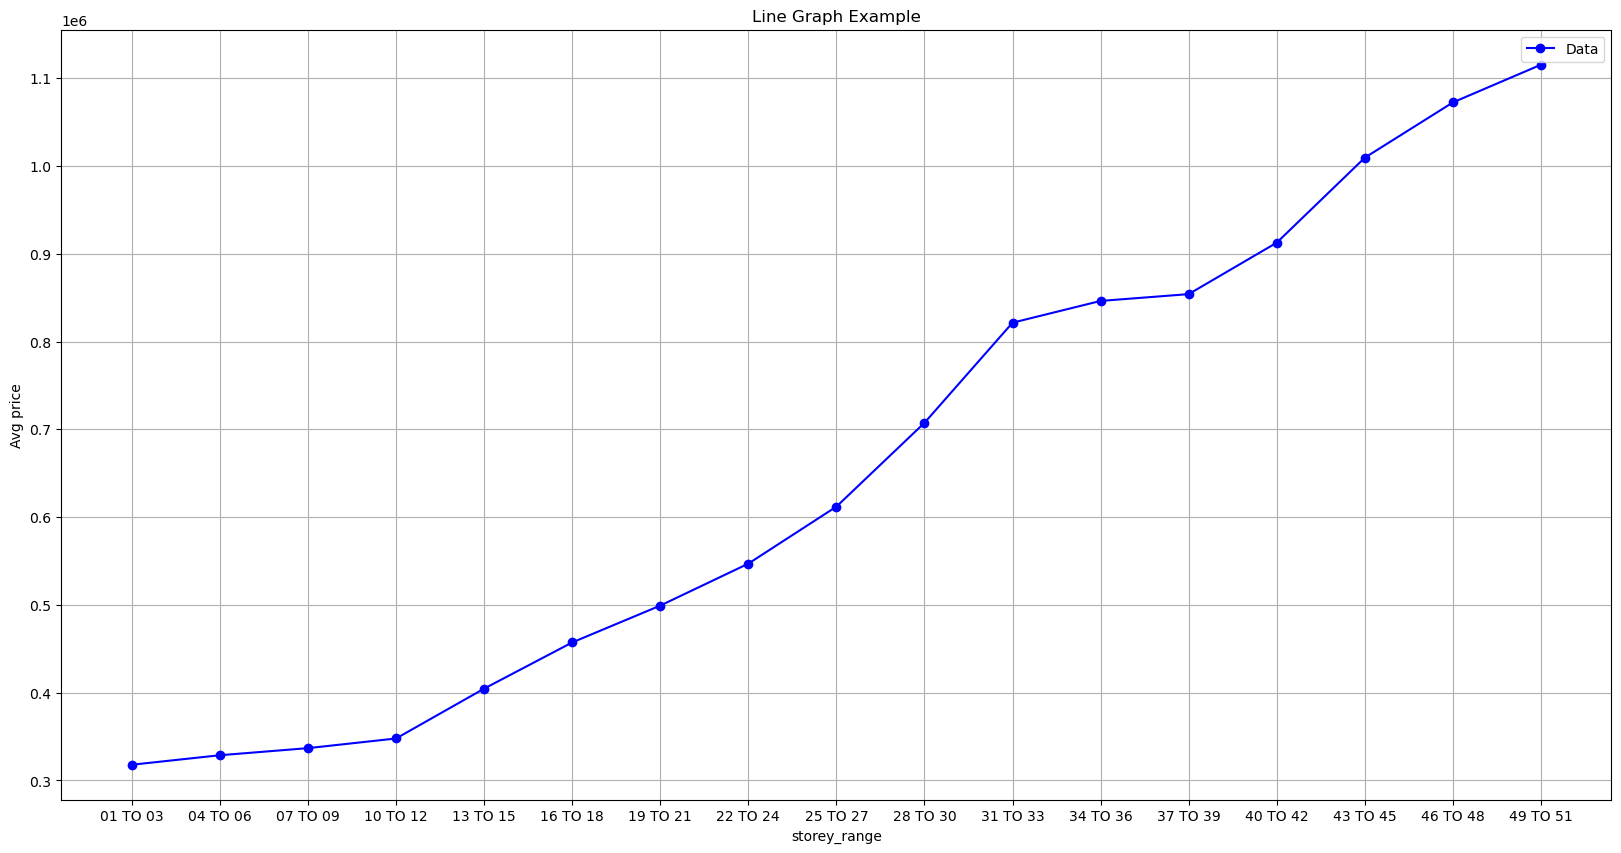

In [84]:
#explore relationship between categorical varibales and target
#explore town vs flat type
average_prices = dfn13.groupby('storey_range')['resale_price'].mean().reset_index()
x_values = average_prices['storey_range']
y_values = average_prices['resale_price']

# Create a line graph
plt.plot(x_values, y_values, marker='o', linestyle='-', color='b', label='Data')

# Customize the graph
plt.title('Line Graph Example')
plt.xlabel('storey_range')
plt.ylabel('Avg price')
plt.grid(True)

# Show a legend (if multiple lines)
plt.legend()

# Display the graph
plt.show()

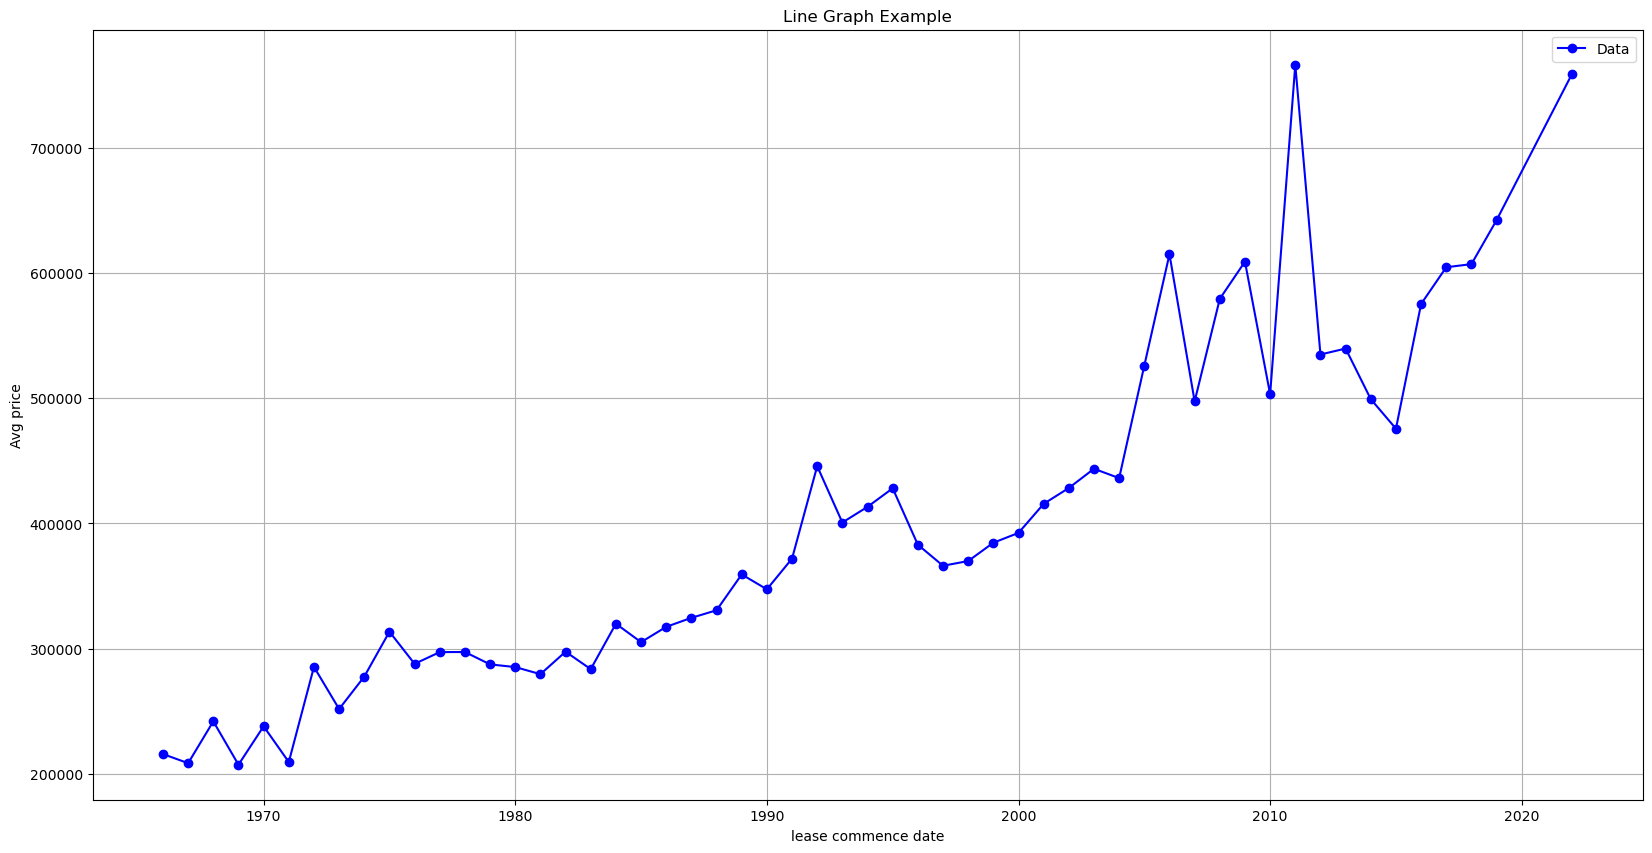

In [88]:
#explore relationship between categorical varibales and target
#explore town vs flat type
average_prices = merged_df.groupby('lease_commence_date')['resale_price'].mean().reset_index()
x_values = average_prices['lease_commence_date']
y_values = average_prices['resale_price']

# Create a line graph
plt.plot(x_values, y_values, marker='o', linestyle='-', color='b', label='Data')

# Customize the graph
plt.title('Line Graph Example')
plt.xlabel('lease commence date')
plt.ylabel('Avg price')
plt.grid(True)

# Show a legend (if multiple lines)
plt.legend()

# Display the graph
plt.show()

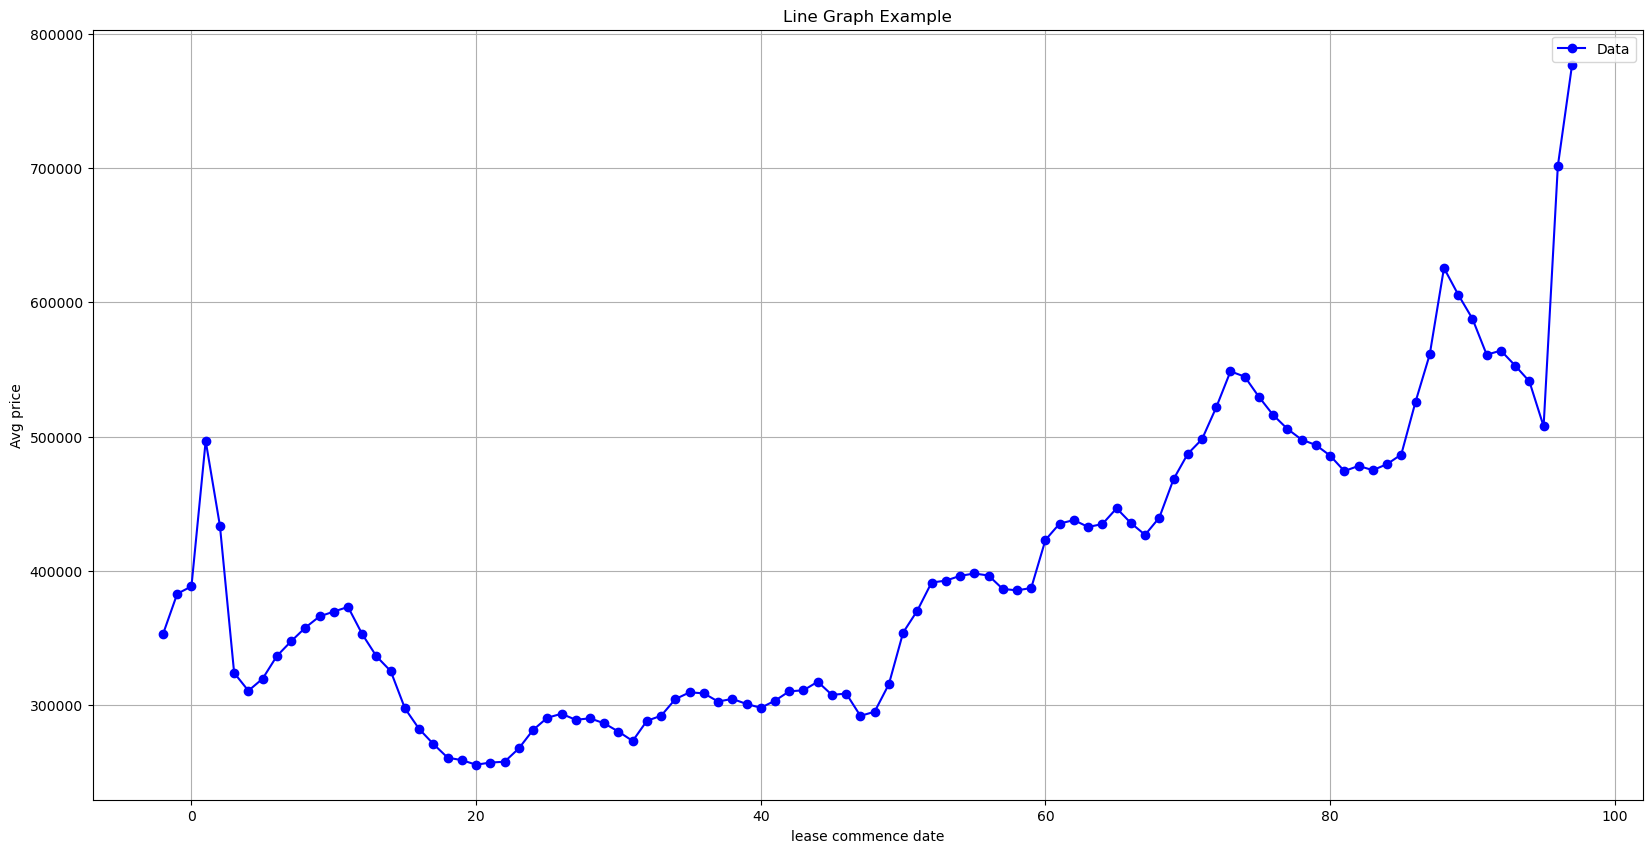

In [97]:
#explore relationship between categorical varibales and target
#explore town vs flat type
average_prices = merged_df.groupby('remaining_lease')['resale_price'].mean().reset_index()
x_values = average_prices['remaining_lease']
y_values = average_prices['resale_price']

# Create a line graph
plt.plot(x_values, y_values, marker='o', linestyle='-', color='b', label='Data')

# Customize the graph
plt.title('Line Graph Example')
plt.xlabel('lease commence date')
plt.ylabel('Avg price')
plt.grid(True)

# Show a legend (if multiple lines)
plt.legend()

# Display the graph
plt.show()

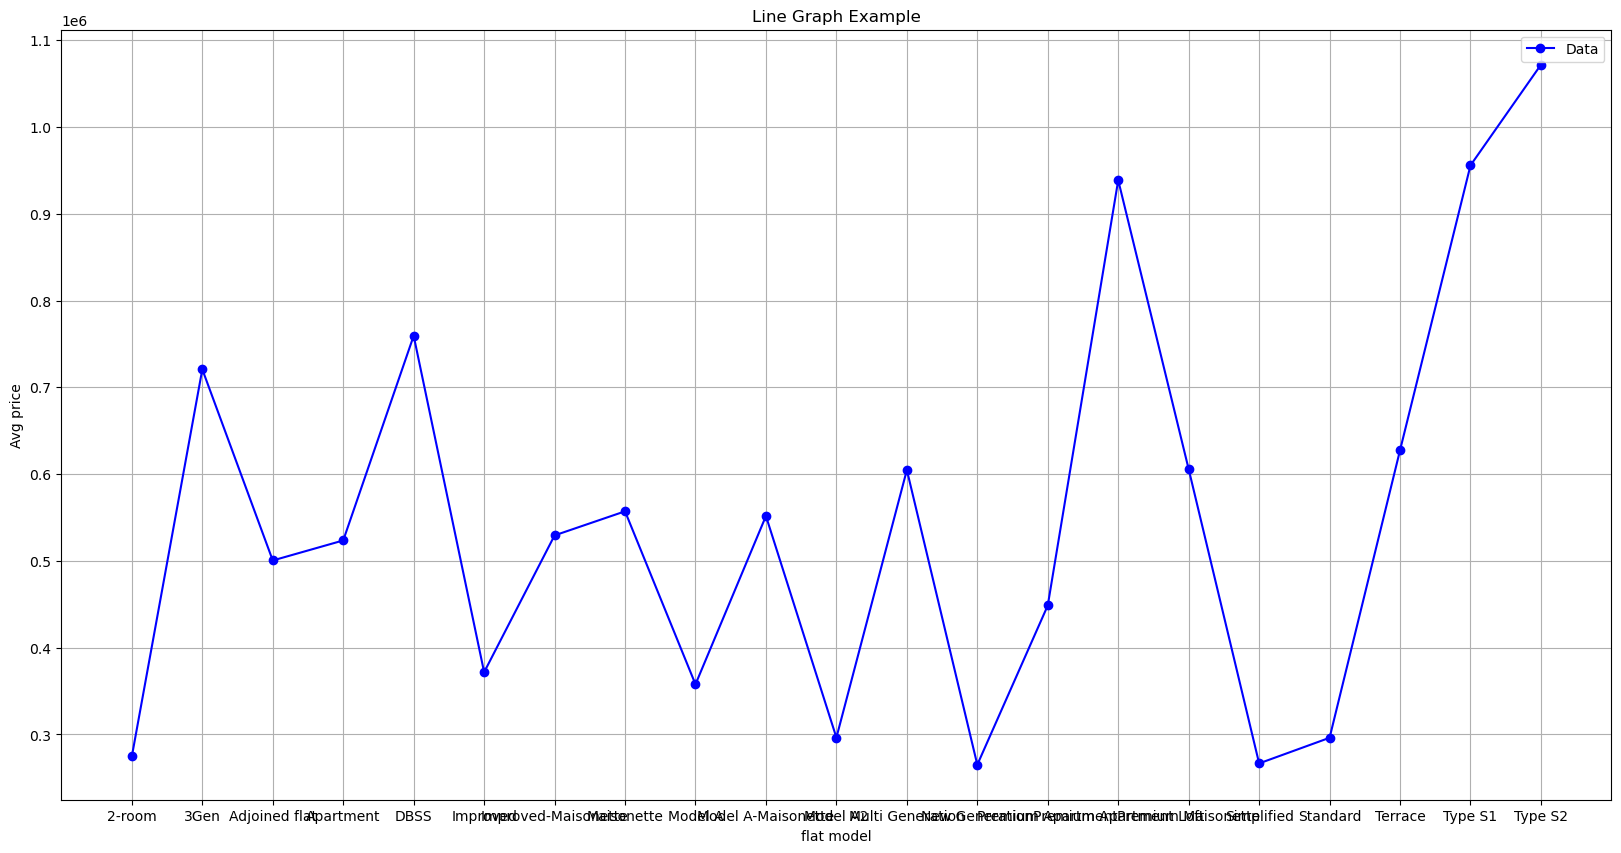

In [89]:
#explore relationship between categorical varibales and target
#explore town vs flat type
average_prices = merged_df.groupby('flat_model')['resale_price'].mean().reset_index()
x_values = average_prices['flat_model']
y_values = average_prices['resale_price']

# Create a line graph
plt.plot(x_values, y_values, marker='o', linestyle='-', color='b', label='Data')

# Customize the graph
plt.title('Line Graph Example')
plt.xlabel('flat model')
plt.ylabel('Avg price')
plt.grid(True)

# Show a legend (if multiple lines)
plt.legend()

# Display the graph
plt.show()

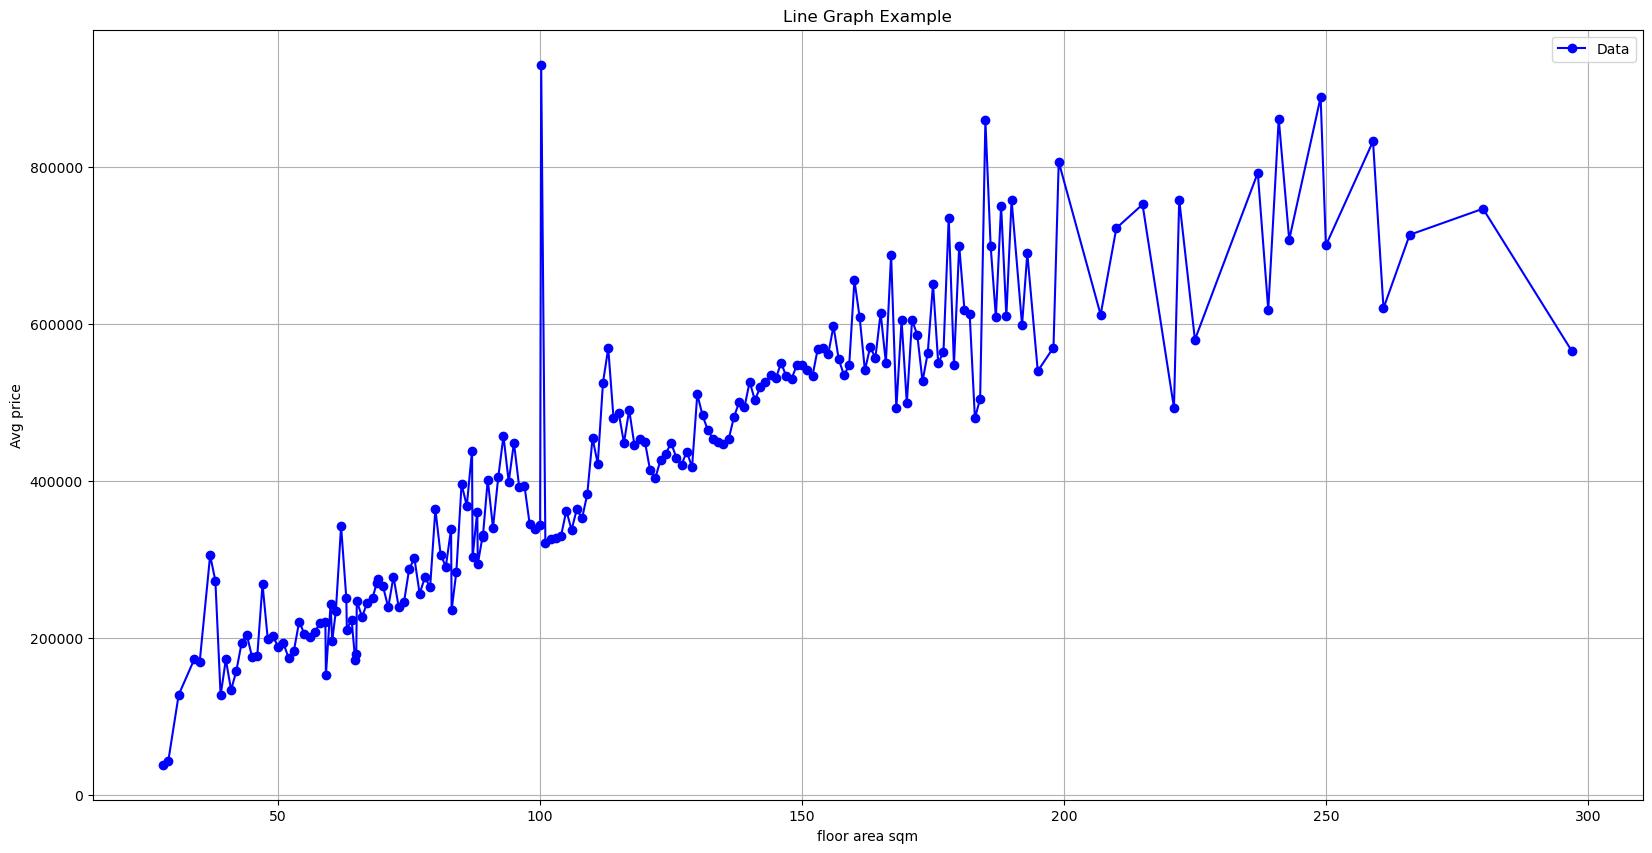

In [96]:
#explore relationship between categorical varibales and target
#explore town vs flat type
average_prices = merged_df.groupby('floor_area_sqm')['resale_price'].mean().reset_index()
x_values = average_prices['floor_area_sqm']
y_values = average_prices['resale_price']

# Create a line graph
plt.plot(x_values, y_values, marker='o', linestyle='-', color='b', label='Data')

# Customize the graph
plt.title('Line Graph Example')
plt.xlabel('floor area sqm')
plt.ylabel('Avg price')
plt.grid(True)

# Show a legend (if multiple lines)
plt.legend()

# Display the graph
plt.show()

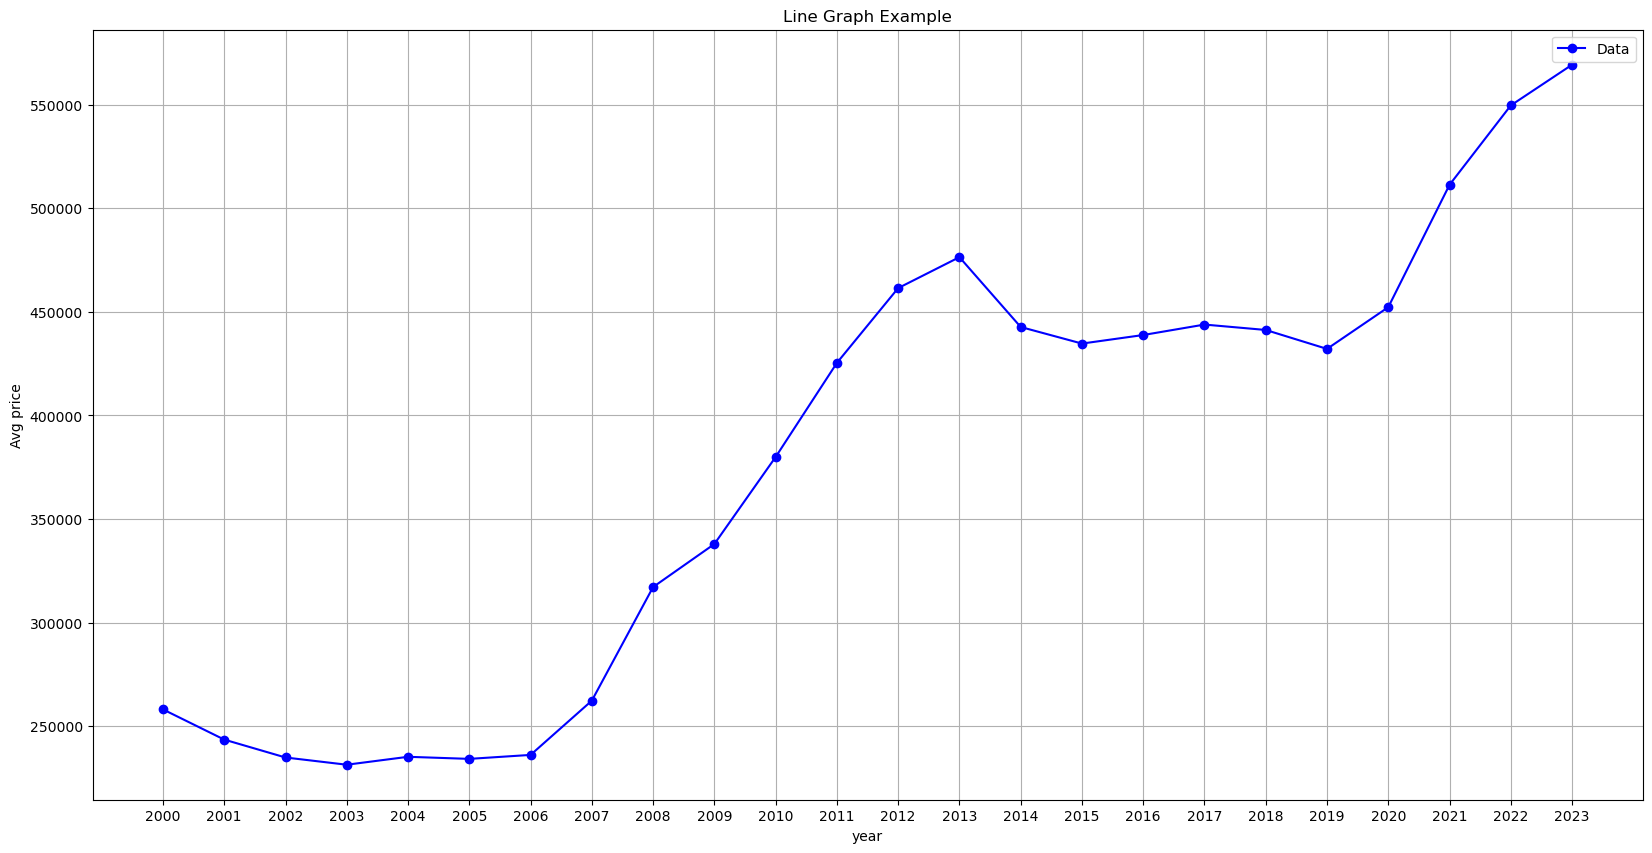

In [91]:
#explore relationship between categorical varibales and target
#explore town vs flat type
average_prices = merged_df.groupby('year')['resale_price'].mean().reset_index()
x_values = average_prices['year']
y_values = average_prices['resale_price']

# Create a line graph
plt.plot(x_values, y_values, marker='o', linestyle='-', color='b', label='Data')

# Customize the graph
plt.title('Line Graph Example')
plt.xlabel('year')
plt.ylabel('Avg price')
plt.grid(True)

# Show a legend (if multiple lines)
plt.legend()

# Display the graph
plt.show()

In [26]:
development = pd.read_csv("CompletionStatusofHDBResidentialDevelopments.csv")
development.head()

,year,type,status,no_of_units
0,2007,HDB Flats,Completed,6247
1,2007,HDB Flats,Under Construction,18073
2,2007,HDB Flats,Awarded,10108
3,2007,DBSS,Completed,na
4,2007,DBSS,Under Construction,na


In [100]:
development.groupby('type')['type'].agg('count')

type
DBSS         30
HDB Flats    45
Name: type, dtype: int64

In [33]:
under_construction = development[(development['status'] =='Under Construction') & (development['type'] =='HDB Flats')] 
under_construction.head()

,year,type,status,no_of_units
1,2007,HDB Flats,Under Construction,18073
6,2008,HDB Flats,Under Construction,31058
11,2009,HDB Flats,Under Construction,35635
16,2010,HDB Flats,Under Construction,43030
21,2011,HDB Flats,Under Construction,58731


In [34]:
completed = development[(development['status'] =='Completed') & (development['type'] =='HDB Flats')] 
completed.head()

,year,type,status,no_of_units
0,2007,HDB Flats,Completed,6247
5,2008,HDB Flats,Completed,1769
10,2009,HDB Flats,Completed,7050
15,2010,HDB Flats,Completed,11888
20,2011,HDB Flats,Completed,17947


In [102]:
average_prices

,remaining_lease,resale_price
0,-2,353000.000000
1,-1,383061.384615
2,0,388568.421053
3,1,496852.685714
4,2,433704.230000
...,...,...
95,93,552909.599105
96,94,541135.693134
97,95,507699.031696
98,96,701464.189474


In [35]:
awarded = development[(development['status'] =='Awarded') & (development['type'] =='HDB Flats')] 
awarded.head()

,year,type,status,no_of_units
2,2007,HDB Flats,Awarded,10108
7,2008,HDB Flats,Awarded,14754
12,2009,HDB Flats,Awarded,11627
17,2010,HDB Flats,Awarded,19283
22,2011,HDB Flats,Awarded,33648


In [ ]:
# merged_df2 = pd.merge(merged_df, completed, on='year')
# merged_df2

In [59]:
hdbRU = pd.read_csv("HDBResidentialUnits.csv")
hdbRU.head()

,year,Total Residential Units,Ang Mo Kio,Bedok,Bishan,Bukit Batok,Bukit Merah,Bukit Panjang,Bukit Timah,Central Area,...,Pasir Ris.6,Punggol.6,Queenstown.6,Sembawang.6,Sengkang.6,Serangoon.6,Tampines.6,Toa Payoh.6,Woodlands.6,Yishun.6
0,2022,1110294,51310,64415,20072,46982,54156,37098,2554,12001,...,154,401,405,0,721,65,655,362,819,722
1,2021,1092898,51310,64415,20072,45585,54158,35325,2554,12001,...,164,403,411,0,732,65,668,367,834,736
2,2020,1079630,51312,63031,20072,45092,54227,35325,2554,12003,...,166,408,424,0,742,65,683,369,846,752
3,2019,1071126,50726,62513,20072,43623,54269,35325,2554,12003,...,169,413,433,0,750,65,707,373,857,766
4,2018,1061236,50728,62156,20072,42988,55110,35325,2554,12004,...,169,420,444,0,760,66,607,379,878,776


In [98]:
allHDBResidentialUnits = hdbRU[['year', 'Total Residential Units']]
allHDBResidentialUnits

,year,Total Residential Units
0,2022,1110294
1,2021,1092898
2,2020,1079630
3,2019,1071126
4,2018,1061236
5,2017,1043968
6,2016,1010613
7,2015,984908
8,2014,959960
9,2013,933278


In [99]:
allHDBResidentialUnits['Unit Difference'] = allHDBResidentialUnits['Total Residential Units'].diff(periods=-1).fillna(0).astype(int)
allHDBResidentialUnits

/var/folders/m8/p0w2_kwn4y1c4prddbt9zf6r0000gn/T/ipykernel_4821/1795486317.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  allHDBResidentialUnits['Unit Difference'] = allHDBResidentialUnits['Total Residential Units'].diff(periods=-1).fillna(0).astype(int)


,year,Total Residential Units,Unit Difference
0,2022,1110294,17396
1,2021,1092898,13268
2,2020,1079630,8504
3,2019,1071126,9890
4,2018,1061236,17268
5,2017,1043968,33355
6,2016,1010613,25705
7,2015,984908,24948
8,2014,959960,26682
9,2013,933278,10785


In [106]:
priceandyear.head()

,resale_price,year
0,147000.0,2000
1,144000.0,2000
2,159000.0,2000
3,167000.0,2000
4,163000.0,2000


In [107]:
allHDBResidentialUnits.head()

,year,Total Residential Units,Unit Difference
0,2022,1110294,17396
1,2021,1092898,13268
2,2020,1079630,8504
3,2019,1071126,9890
4,2018,1061236,17268


In [111]:
priceandyear['year']=priceandyear['year'].astype(int)
allHDBResidentialUnits['year']=allHDBResidentialUnits['year'].astype(int)

/var/folders/m8/p0w2_kwn4y1c4prddbt9zf6r0000gn/T/ipykernel_4821/2553629043.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  priceandyear['year']=priceandyear['year'].astype(int)
/var/folders/m8/p0w2_kwn4y1c4prddbt9zf6r0000gn/T/ipykernel_4821/2553629043.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  allHDBResidentialUnits['year']=allHDBResidentialUnits['year'].astype(int)


In [113]:
pricewithunits = pd.merge(priceandyear, allHDBResidentialUnits, on='year')
pricewithunits.head()

,resale_price,year,Total Residential Units,Unit Difference
0,147000.0,2000,843299,0
1,144000.0,2000,843299,0
2,159000.0,2000,843299,0
3,167000.0,2000,843299,0
4,163000.0,2000,843299,0


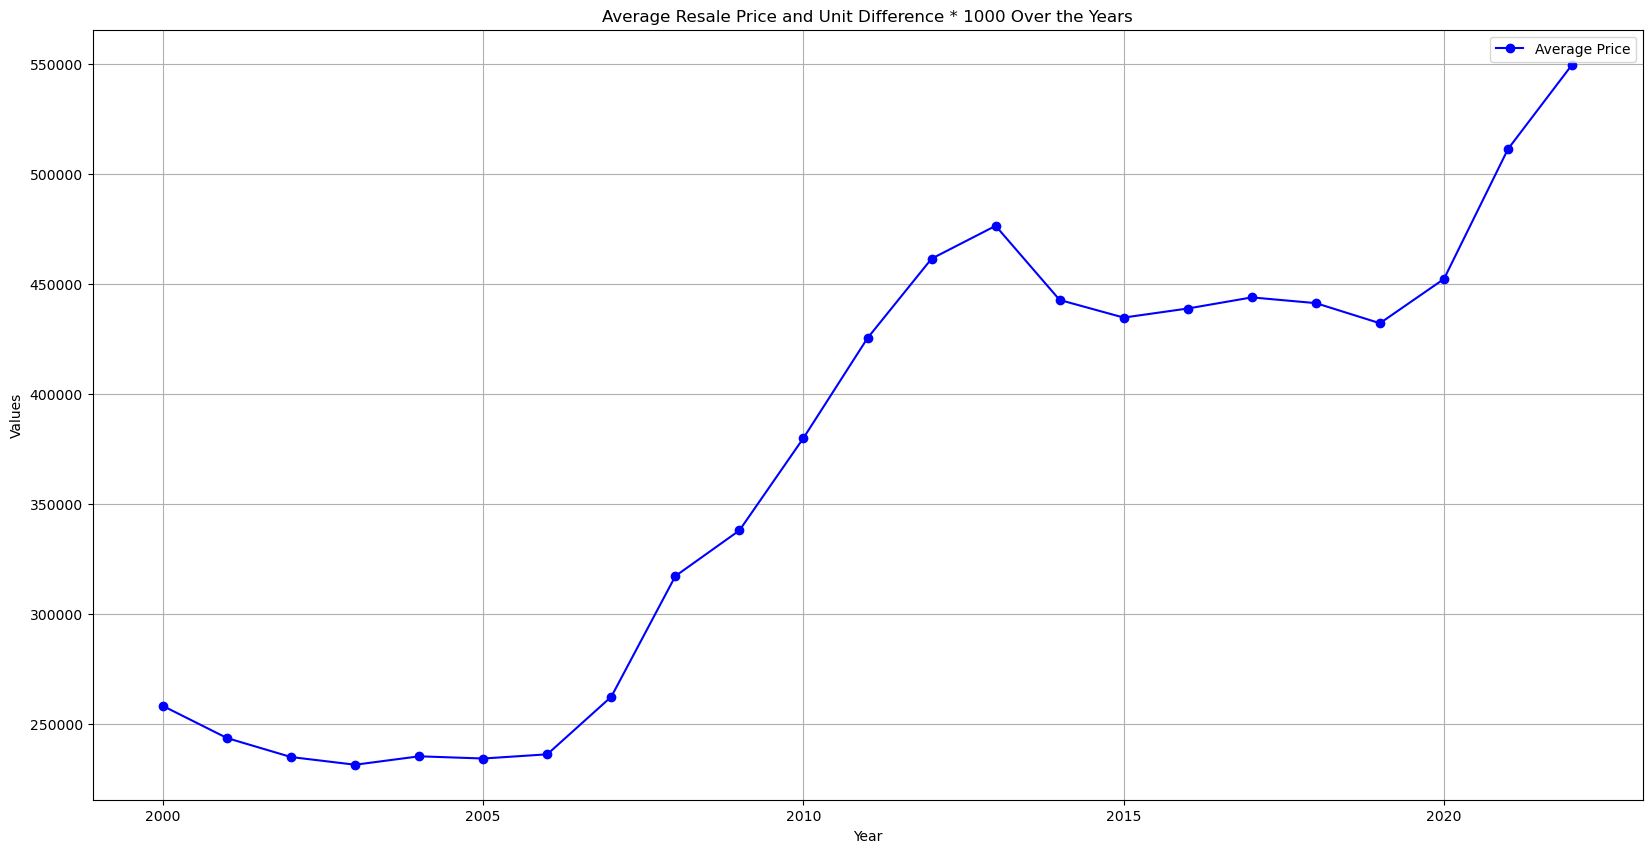

In [120]:
# Group by year and calculate the average resale price and unit difference * 1000 for each year
average_prices = pricewithunits.groupby('year')['resale_price'].mean().reset_index()
# average_prices = merged_df.groupby('year')['resale_price'].mean().reset_index()
unit_difference = pricewithunits.groupby('year')['Unit Difference'].sum().reset_index()

# Create a line graph with two lines
# plt.figure(figsize=(10, 6))
plt.plot(average_prices['year'], average_prices['resale_price'], marker='o', linestyle='-', color='b', label='Average Price')
# plt.plot(unit_difference['year'], unit_difference['Unit Difference'], marker='o', linestyle='-', color='r', label='Unit Difference * 1000')
plt.xlabel('Year')
plt.ylabel('Values')
plt.title('Average Resale Price and Unit Difference * 1000 Over the Years')
plt.grid(True)
plt.legend()

# Display the graph
plt.show()

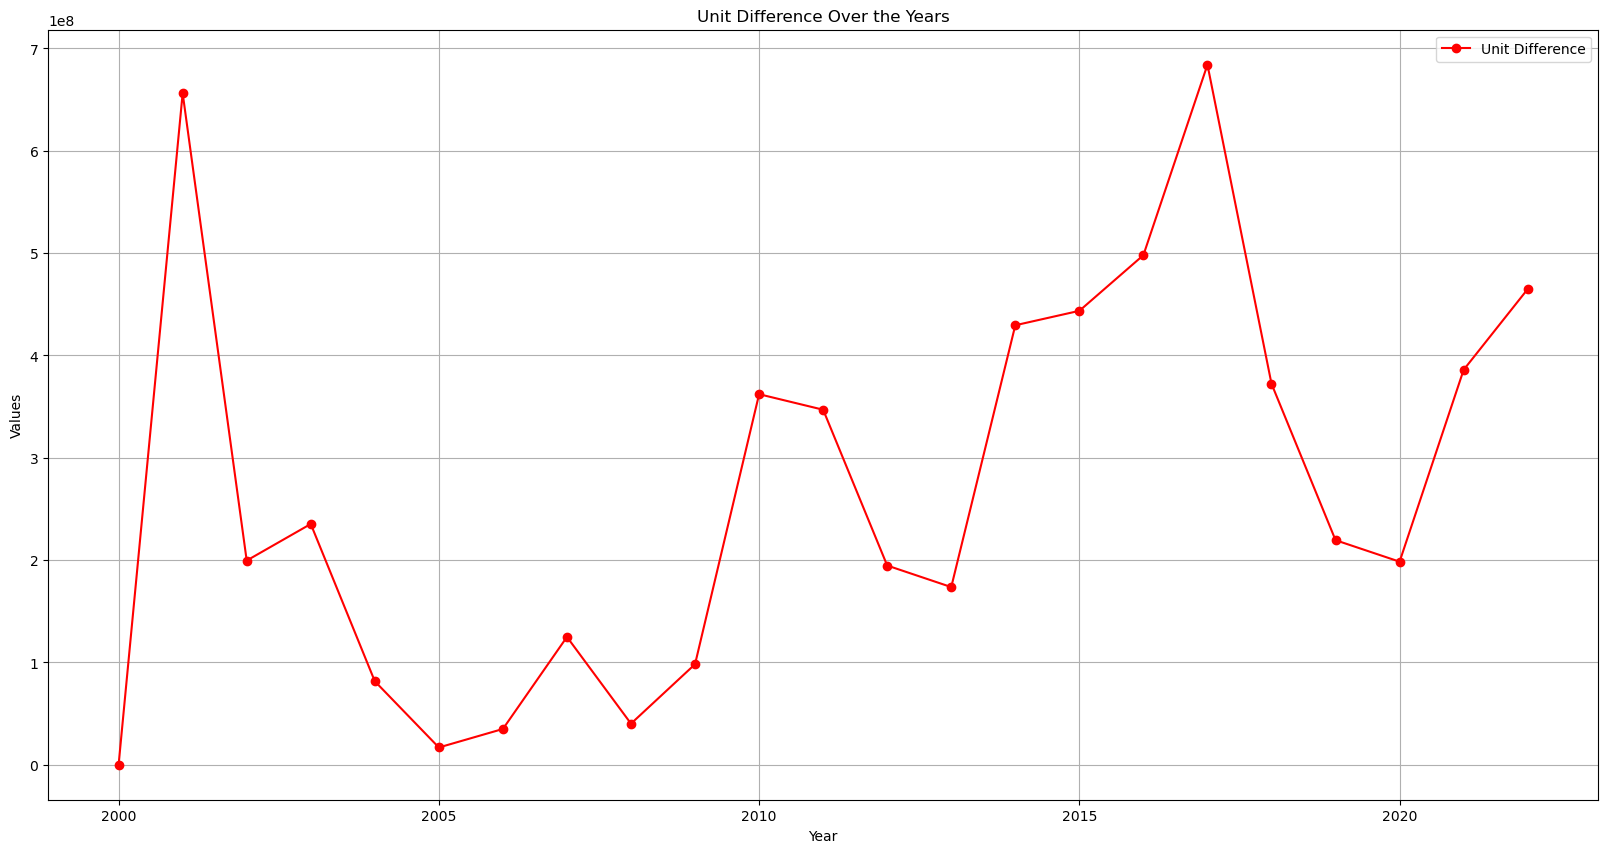

In [119]:
# Group by year and calculate the average resale price and unit difference * 1000 for each year
average_prices = pricewithunits.groupby('year')['resale_price'].mean().reset_index()
# average_prices = merged_df.groupby('year')['resale_price'].mean().reset_index()
unit_difference = pricewithunits.groupby('year')['Unit Difference'].sum().reset_index()

# Create a line graph with two lines
# plt.figure(figsize=(10, 6))
# plt.plot(average_prices['year'], average_prices['resale_price'], marker='o', linestyle='-', color='b', label='Average Price')
plt.plot(unit_difference['year'], unit_difference['Unit Difference'], marker='o', linestyle='-', color='r', label='Unit Difference')
plt.xlabel('Year')
plt.ylabel('Values')
plt.title('Unit Difference Over the Years')
plt.grid(True)
plt.legend()

# Display the graph
plt.show()

In [60]:
allHDBResidentialUnits = hdbRU[['year','Total Residential Units','Ang Mo Kio','Bedok','Bishan','Bukit Batok','Bukit Merah','Bukit Panjang','Bukit Timah','Central Area','Choa Chu Kang','Clementi','Geylang','Hougang','Jurong East','Jurong West','Kallang/Whampoa','Marine Parade','Pasir Ris','Punggol','Queenstown','Sembawang','Sengkang','Serangoon','Tampines','Toa Payoh','Woodlands','Yishun']]
allHDBResidentialUnits.head()


,year,Total Residential Units,Ang Mo Kio,Bedok,Bishan,Bukit Batok,Bukit Merah,Bukit Panjang,Bukit Timah,Central Area,...,Pasir Ris,Punggol,Queenstown,Sembawang,Sengkang,Serangoon,Tampines,Toa Payoh,Woodlands,Yishun
0,2022,1110294,51310,64415,20072,46982,54156,37098,2554,12001,...,29654,57598,34676,30330,71437,21632,77946,43566,70701,68859
1,2021,1092898,51310,64415,20072,45585,54158,35325,2554,12001,...,29654,54926,36380,30330,69526,21632,75342,42185,70072,65614
2,2020,1079630,51312,63031,20072,45092,54227,35325,2554,12003,...,29654,51704,33973,30020,69196,21632,73210,40591,69900,65158
3,2019,1071126,50726,62513,20072,43623,54269,35325,2554,12003,...,29654,49909,33164,30020,69196,21632,72684,39332,69900,64334
4,2018,1061236,50728,62156,20072,42988,55110,35325,2554,12004,...,29654,49909,32676,27241,67116,21634,70755,38455,69900,64334


In [94]:
population = pd.read_csv("singapore-population-2023-10-21.csv")
population

,Year,Population,Annual Grown
0,2000-12-31,4053602,2.20
1,2001-12-31,4121337,1.67
2,2002-12-31,4176794,1.35
3,2003-12-31,4226413,1.19
4,2004-12-31,4270401,1.04
5,2005-12-31,4344637,1.74
6,2006-12-31,4486583,3.27
7,2007-12-31,4663256,3.94
8,2008-12-31,4838402,3.76
9,2009-12-31,5010704,3.56


In [ ]:
population = pd.read_csv("singapore-population-2023-10-21.csv")
population

In [95]:
#slipt sold year and month


ValueError: Columns must be same length as key

In [58]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
install

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

AttributeError: module 'numpy' has no attribute '_no_nep50_warning'

In [52]:


# Sample DataFrame with your data
X1 = merged_df[['resale_price', 'bedroom', 'bathroom', 'sold_year', 'sold_month']]  # Include other relevant features
y1 = merged_df['price_range']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

classifier = RandomForestClassifier()
classifier.fit(X_train1, y_train1)

# User enters a price
user_price = 600000  # Replace with the user's input

# Get the current year and month
current_date = datetime.now()
current_year = current_date.year
current_month = current_date.month

# Predict the price range for the current year
predicted_price_range = classifier.predict([[user_price, 0, 0, current_year, current_month]])[0]

# Filter data by the predicted price range
filtered_data = df[df['price_range'] == predicted_price_range]

# Find the house with the most bedrooms
best_house = filtered_data[filtered_data['bedroom'] == filtered_data['bedroom'].max()]

print(f"The predicted price range for {user_price} in {current_year}-{current_month} is {predicted_price_range}.")
print("The best house within this price range with the most bedrooms is:")
print(best_house)

AttributeError: module 'numpy.linalg._umath_linalg' has no attribute '_ilp64'

In [ ]:
pip install --upgrade tensorflow

In [12]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [34]:
import keras
import tensorflow as tf

In [14]:
towns = pd.get_dummies(merged_df.town)
towns.head(3)

,ANG MO KIO,BEDOK,BISHAN,BUKIT BATOK,BUKIT MERAH,BUKIT PANJANG,BUKIT TIMAH,CENTRAL AREA,CHOA CHU KANG,CLEMENTI,...,PASIR RIS,PUNGGOL,QUEENSTOWN,SEMBAWANG,SENGKANG,SERANGOON,TAMPINES,TOA PAYOH,WOODLANDS,YISHUN
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
merged_df2 = pd.concat([merged_df,towns],axis='columns')
merged_df2.head(3)

,soldmonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,...,PASIR RIS,PUNGGOL,QUEENSTOWN,SEMBAWANG,SENGKANG,SERANGOON,TAMPINES,TOA PAYOH,WOODLANDS,YISHUN
0,2000-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986,14,...,0,0,0,0,0,0,0,0,0,0
1,2000-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,14,...,0,0,0,0,0,0,0,0,0,0
2,2000-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,24,...,0,0,0,0,0,0,0,0,0,0


In [21]:
merged_df2["floor_area_sqm"]=merged_df2["floor_area_sqm"].astype(int)
merged_df2["resale_price"]=merged_df2["resale_price"].astype(int)

In [42]:
X = merged_df2.drop(columns=['resale_price'])
Y = merged_df2[['resale_price']]

In [44]:
#relu is one methods
model = keras.Sequential()
model.add(keras.layers.Dense(43,activation='relu', input_shape=(3,)))
model.add(keras.layers.Dense(43,activation='relu'))
model.add(keras.layers.Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

In [45]:
x_train = np.array(X)  
y_train = np.array(Y)

In [47]:
x_train = np.array([np.array(val) for val in X])

In [40]:
x_train

array(['soldmonth', 'town', 'flat_type', 'block', 'street_name',
       'storey_range', 'floor_area_sqm', 'flat_model',
       'lease_commence_date', 'remaining_lease', 'bedroom', 'bathrooom',
       'separatekitchen', 'studyroom', 'HShelter', 'year', 'month',
       'ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL',
       'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
       'TOA PAYOH', 'WOODLANDS', 'YISHUN'], dtype='<U19')

In [48]:
y_train = np.array([np.array(val) for val in Y])

In [41]:
y_train

array(['resale_price'], dtype='<U12')

In [29]:
y_array = np.asarray(Y)

In [49]:
model.fit(x_train,y_train,epochs=30,callbacks=[keras.callbacks.EarlyStopping(patience=5)])

ValueError: Data cardinality is ambiguous:
  x sizes: 43
  y sizes: 1
Make sure all arrays contain the same number of samples.